Bussines Understanding

Formulación del problema: cancelaciones de suscripciones de clientes de la empresa Interconnect.

Hipótesis: los comportamientos de consumo de los clientes son diferentes cuando están cercanos a abandonar la suscripción.

KPI: variable is_churn (1 si va a abandonar y 0 si no)

Para el problema del negocio es sumamente importante predecir correctamente si un usuario va a abandonar y el tener falsos negativos (usuarios que van a abandonar pero se predijo que no lo harán supondrían grandes perdidas). Por esta razón se debe priorizar el recall.

Data understanding

In [756]:
import pandas as pd
import matplotlib.pyplot as plt

In [757]:
def ver_nulos_string(df):
    #Ver valores nulos '' en cada columna
    print(f"Valores nulos ''")
    for col in df.columns:
        if df[col].dtype == 'object':
            print(f"{col}: {df[col].isnull().sum()} nulos, {df[col].eq('').sum()+df[col].eq(' ').sum()} vacíos")
        else:
            print(f"{col}: {df[col].isnull().sum()} nulos")

In [758]:
def ver_valores_unicos(df, array):
    #Ver valores únicos y no solo la cantidad de unicos en cada columna a excepción de las que son fechas, id, monthlycharges y totalcharges
    print("Valores únicos:")
    for col in df.columns:
        if col not in array:
            if df[col].dtype == 'object':
                print(f"{col}: {df[col].nunique()} únicos, {df[col].unique()}")
            elif df[col].dtype == 'int64' or df[col].dtype == 'float64':
                print(f"{col}: {df[col].nunique()} únicos, {df[col].unique()}")
        else:
            print(f"{col}: {df[col].nunique()} únicos")

In [759]:
#Cargar los datos
contract = pd.read_csv('./data/contract.csv')
internet = pd.read_csv('./data/internet.csv')
personal = pd.read_csv('./data/personal.csv')
phone = pd.read_csv('./data/phone.csv')

Contract

In [760]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [761]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [762]:
#Ver si hay valores nulos
print("Valores nulos en contract:")
print(contract.isnull().sum())
#Ver si hay duplicados
print("Duplicados en contract:")
print(contract.duplicated().sum())

Valores nulos en contract:
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64
Duplicados en contract:
0


In [763]:
ver_valores_unicos(contract, ['customerID', 'BeginDate', 'EndDate', 'MonthlyCharges', 'TotalCharges'])

Valores únicos:
customerID: 7043 únicos
BeginDate: 77 únicos
EndDate: 5 únicos
Type: 3 únicos, ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: 2 únicos, ['Yes' 'No']
PaymentMethod: 4 únicos, ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: 1585 únicos
TotalCharges: 6531 únicos


In [764]:
#Ver valores nulos '' en cada columna
ver_nulos_string(contract)

Valores nulos ''
customerID: 0 nulos, 0 vacíos
BeginDate: 0 nulos, 0 vacíos
EndDate: 0 nulos, 0 vacíos
Type: 0 nulos, 0 vacíos
PaperlessBilling: 0 nulos, 0 vacíos
PaymentMethod: 0 nulos, 0 vacíos
MonthlyCharges: 0 nulos
TotalCharges: 0 nulos, 11 vacíos


In [765]:
#Verificar si en TotalCharges hay valores 0
print("Valores 0 en TotalCharges:")
print(contract['TotalCharges'].eq(0).sum())

Valores 0 en TotalCharges:
0


In [766]:
#Convertir los nulos de TotalCharges a 0
contract['TotalCharges'] = contract['TotalCharges'].replace('', 0)
contract['TotalCharges'] = contract['TotalCharges'].replace(' ', 0)

In [767]:
#Convertir TotalCharges a float64
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'])

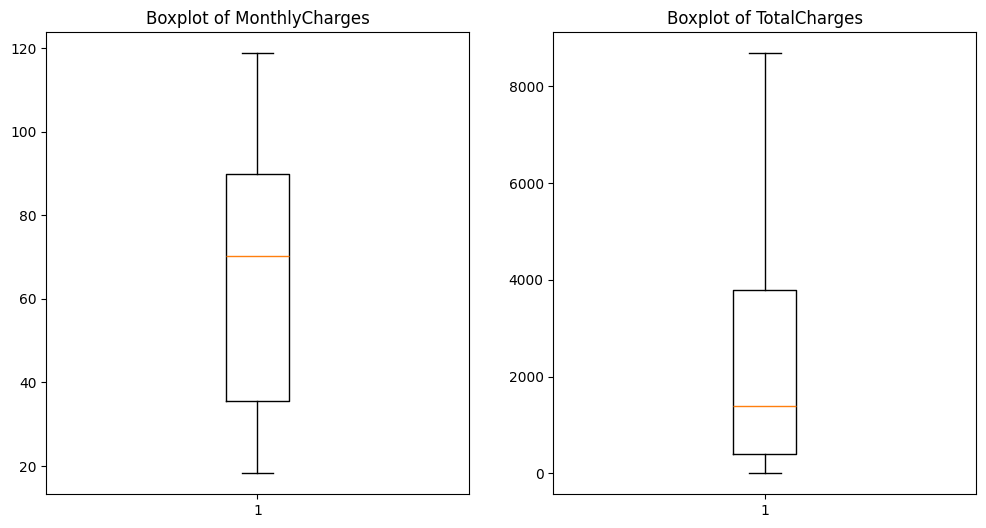

In [768]:
#Gráfico de boxplot para MonthlyCharges y TotalCharges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(contract['MonthlyCharges'])
plt.title('Boxplot of MonthlyCharges')
plt.subplot(1, 2, 2)
plt.boxplot(contract['TotalCharges'])
plt.title('Boxplot of TotalCharges')
plt.show()


Internet

In [769]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [770]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [771]:
#Verificar si hay valores nulos
print("Valores nulos en internet:")
print(internet.isnull().sum())
#Verificar si hay duplicados
print("Duplicados en internet:")
print(internet.duplicated().sum())

Valores nulos en internet:
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64
Duplicados en internet:
0


In [772]:
#Ver valores nulos '' en cada columna
ver_nulos_string(internet)

Valores nulos ''
customerID: 0 nulos, 0 vacíos
InternetService: 0 nulos, 0 vacíos
OnlineSecurity: 0 nulos, 0 vacíos
OnlineBackup: 0 nulos, 0 vacíos
DeviceProtection: 0 nulos, 0 vacíos
TechSupport: 0 nulos, 0 vacíos
StreamingTV: 0 nulos, 0 vacíos
StreamingMovies: 0 nulos, 0 vacíos


In [773]:
#Ver valores unicos en cada columna
ver_valores_unicos(internet, ['customerID'])

Valores únicos:
customerID: 5517 únicos
InternetService: 2 únicos, ['DSL' 'Fiber optic']
OnlineSecurity: 2 únicos, ['No' 'Yes']
OnlineBackup: 2 únicos, ['Yes' 'No']
DeviceProtection: 2 únicos, ['No' 'Yes']
TechSupport: 2 únicos, ['No' 'Yes']
StreamingTV: 2 únicos, ['No' 'Yes']
StreamingMovies: 2 únicos, ['No' 'Yes']


Personal

In [774]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [775]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [776]:
#Verificar si hay valores nulos
print("Valores nulos en personal:")
print(personal.isnull().sum())  
#Verificar si hay duplicados
print("Duplicados en personal:")
print(personal.duplicated().sum())

Valores nulos en personal:
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64
Duplicados en personal:
0


In [777]:
ver_nulos_string(personal)

Valores nulos ''
customerID: 0 nulos, 0 vacíos
gender: 0 nulos, 0 vacíos
SeniorCitizen: 0 nulos
Partner: 0 nulos, 0 vacíos
Dependents: 0 nulos, 0 vacíos


In [778]:
ver_valores_unicos(personal, ['customerID'])

Valores únicos:
customerID: 7043 únicos
gender: 2 únicos, ['Female' 'Male']
SeniorCitizen: 2 únicos, [0 1]
Partner: 2 únicos, ['Yes' 'No']
Dependents: 2 únicos, ['No' 'Yes']


Phone

In [779]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [780]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [781]:
#Verificar si hay valores nulos
print("Valores nulos en phone:")
print(phone.isnull().sum())
#Verificar si hay duplicados
print("Duplicados en phone:")
print(phone.duplicated().sum())

Valores nulos en phone:
customerID       0
MultipleLines    0
dtype: int64
Duplicados en phone:
0


In [782]:
ver_nulos_string(phone)

Valores nulos ''
customerID: 0 nulos, 0 vacíos
MultipleLines: 0 nulos, 0 vacíos


In [783]:
ver_valores_unicos(phone, ['customerID'])

Valores únicos:
customerID: 6361 únicos
MultipleLines: 2 únicos, ['No' 'Yes']


Data Preparation

In [784]:
#Convertir los valores nominales a numéricos usando dummies
#No se realiza drop_first=True
contract = pd.get_dummies(contract, columns=['Type', 'PaperlessBilling', 'PaymentMethod'], drop_first=True)
#Para internet service se realiza drop_first=False para manejar casos que no tiene ni 'DSL' ni 'Fiber optic'
#En el resto de campos, al tenerlos en False se entiende que no tiene el servicio
internet = pd.get_dummies(internet, columns=['InternetService'], drop_first=False)
internet = pd.get_dummies(internet, columns=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], drop_first=True)
personal = pd.get_dummies(personal, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents'], drop_first=True)
#Para MultipleLines se realiza drop_first=False para manejar casos que no tiene PhoneService
phone = pd.get_dummies(phone, columns=['MultipleLines'], drop_first=False)

In [785]:
#Merge de las tablas en un solo one big table
df= pd.merge(contract, internet, on='customerID', how='outer')
#Ver si hay nulos
print("Valores nulos en df:")
print(df.isnull().sum())
#Rellenar los nulos con False
df = df.fillna(False)


Valores nulos en df:
customerID                                  0
BeginDate                                   0
EndDate                                     0
MonthlyCharges                              0
TotalCharges                                0
Type_One year                               0
Type_Two year                               0
PaperlessBilling_Yes                        0
PaymentMethod_Credit card (automatic)       0
PaymentMethod_Electronic check              0
PaymentMethod_Mailed check                  0
InternetService_DSL                      1526
InternetService_Fiber optic              1526
OnlineSecurity_Yes                       1526
OnlineBackup_Yes                         1526
DeviceProtection_Yes                     1526
TechSupport_Yes                          1526
StreamingTV_Yes                          1526
StreamingMovies_Yes                      1526
dtype: int64


In [786]:
#Merge de df con personal
df = pd.merge(df, personal, on='customerID', how='outer')
#Ver si hay nulos
print("Valores nulos en df:")
print(df.isnull().sum())


Valores nulos en df:
customerID                               0
BeginDate                                0
EndDate                                  0
MonthlyCharges                           0
TotalCharges                             0
Type_One year                            0
Type_Two year                            0
PaperlessBilling_Yes                     0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
InternetService_DSL                      0
InternetService_Fiber optic              0
OnlineSecurity_Yes                       0
OnlineBackup_Yes                         0
DeviceProtection_Yes                     0
TechSupport_Yes                          0
StreamingTV_Yes                          0
StreamingMovies_Yes                      0
gender_Male                              0
SeniorCitizen_1                          0
Partner_Yes                              0
Dependents_Yes                   

In [787]:
#Merge de df con phone
df = pd.merge(df, phone, on='customerID', how='outer')
#Ver si hay nulos
print("Valores nulos en df:")
print(df.isnull().sum())
#Rellenar los nulos con False
df = df.fillna(False)

Valores nulos en df:
customerID                                 0
BeginDate                                  0
EndDate                                    0
MonthlyCharges                             0
TotalCharges                               0
Type_One year                              0
Type_Two year                              0
PaperlessBilling_Yes                       0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
InternetService_DSL                        0
InternetService_Fiber optic                0
OnlineSecurity_Yes                         0
OnlineBackup_Yes                           0
DeviceProtection_Yes                       0
TechSupport_Yes                            0
StreamingTV_Yes                            0
StreamingMovies_Yes                        0
gender_Male                                0
SeniorCitizen_1                            0
Partner_Yes                       

In [788]:
#Ver el nuevo dataframe
df.head()

,customerID,BeginDate,EndDate,MonthlyCharges,TotalCharges,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No,MultipleLines_Yes
0,7590-VHVEG,2020-01-01,No,29.85,29.85,False,False,True,False,True,...,False,False,False,False,False,False,True,False,False,False
1,5575-GNVDE,2017-04-01,No,56.95,1889.50,True,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,53.85,108.15,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
3,7795-CFOCW,2016-05-01,No,42.30,1840.75,True,False,False,False,False,...,True,True,False,False,True,False,False,False,False,False
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,70.70,151.65,False,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False


In [789]:
#Añadir variable de churn. Si EndDate es 'No', churn tiene el valor 0, caso contrario 1
df['Churn'] = df['EndDate'].apply(lambda x: False if x == 'No' else True)
df.head()


,customerID,BeginDate,EndDate,MonthlyCharges,TotalCharges,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No,MultipleLines_Yes,Churn
0,7590-VHVEG,2020-01-01,No,29.85,29.85,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
1,5575-GNVDE,2017-04-01,No,56.95,1889.50,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,53.85,108.15,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,True
3,7795-CFOCW,2016-05-01,No,42.30,1840.75,True,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,70.70,151.65,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,True


In [790]:
#Ver la fecha endDate más reciente
print("Fecha más reciente de EndDate (fecha de la que más conocimiento tenemos del presente):")
#Se omite 'No'
print(df['EndDate'].loc[df['EndDate'] != 'No'].max())
fecha_max = df['EndDate'].loc[df['EndDate'] != 'No'].max()
#Asignar la fecha más reciente a la columna EndDate de los que tienen 'No'
df['EndDate'] = df['EndDate'].replace('No', fecha_max)
#Convertir EndDate a datetime
df['EndDate'] = pd.to_datetime(df['EndDate'], format='%Y-%m-%d %H:%M:%S')
#Convertir BeginDate a datetime
df['BeginDate'] = pd.to_datetime(df['BeginDate'], format='%Y-%m-%d')
# #Obtener la variable de duración en días del contrato
# #Asumiendo que la duración de los que siguen con el contrato es la fecha más reciente 
# #de la que se tiene conocimiento menos la fecha de inicio
# df['Duration'] = (df['EndDate'] - df['BeginDate']).dt.days

Fecha más reciente de EndDate (fecha de la que más conocimiento tenemos del presente):
2020-01-01 00:00:00


In [791]:
#Verificar que no existan IDs duplicados (mismos valores en la columna customerID)
print("Total de filas en df:")
print(df.shape[0])
print("Total de valores unicos en customerID:")
print(df.nunique()['customerID'])

Total de filas en df:
7043
Total de valores unicos en customerID:
7043


In [792]:
#Eliminar columnas que no se van a usar
df = df.drop(['customerID', 'BeginDate', 'EndDate'], axis=1)

In [793]:
#Ver el nuevo dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MonthlyCharges                         7043 non-null   float64
 1   TotalCharges                           7043 non-null   float64
 2   Type_One year                          7043 non-null   bool   
 3   Type_Two year                          7043 non-null   bool   
 4   PaperlessBilling_Yes                   7043 non-null   bool   
 5   PaymentMethod_Credit card (automatic)  7043 non-null   bool   
 6   PaymentMethod_Electronic check         7043 non-null   bool   
 7   PaymentMethod_Mailed check             7043 non-null   bool   
 8   InternetService_DSL                    7043 non-null   bool   
 9   InternetService_Fiber optic            7043 non-null   bool   
 10  OnlineSecurity_Yes                     7043 non-null   bool   
 11  Onli

Modelling

In [794]:
#Ver el porcentaje de churn True respecto al total
print("Porcentaje de churn True respecto al total:")
#Dividir el total de churn True entre el total de churns
print(df['Churn'].sum()/df.shape[0])


Porcentaje de churn True respecto al total:
0.2653698707936959


In [795]:
#Balancear el dataset
#Se utiliza el método de oversampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
#Separar las variables predictoras de la variable objetivo
X = df.drop('Churn', axis=1)
y = df['Churn']
#Contar el número de ejemplos de cada clase
print("Número de ejemplos de cada clase:")
print(Counter(y))
#Crear el objeto RandomOverSampler
ros = RandomOverSampler(random_state=42)
#Aplicar el oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)
#Contar el número de ejemplos de cada clase después del oversampling
print("Número de ejemplos de cada clase después del oversampling:")
print(Counter(y_resampled))



Número de ejemplos de cada clase:
Counter({False: 5174, True: 1869})
Número de ejemplos de cada clase después del oversampling:
Counter({False: 5174, True: 5174})


Como se tiene más del 25% de valores clasificados como True no es necesario realizar nada

In [796]:
#Import de standardScaler
from sklearn.preprocessing import StandardScaler
#Escalado de las columnas numéricas MonthlyCharges, TotalCharges y Duration
scaler = StandardScaler()
#Se escalan las columnas numéricas
# df[['MonthlyCharges', 'TotalCharges', 'Duration']] = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges', 'Duration']])
df[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges']])

In [797]:
r_state = 42

In [798]:
#Uso de train_test_split estratificado para evitar desbalanceo en 'Churn'
from sklearn.model_selection import train_test_split
#Import de score ROC_AUC y recall
from sklearn.metrics import roc_auc_score, recall_score


train, test = train_test_split(df, test_size=0.3, random_state=r_state, stratify=df['Churn'])
x_train = train.drop('Churn', axis=1)
y_train = train['Churn']
x_test = test.drop('Churn', axis=1)
y_test = test['Churn']


Entrenamiento con ROC-AUC

In [799]:
#Regresión logística
from sklearn.linear_model import LogisticRegression

#Entrenar el modelo
grid_params = {'C': [0.01, 0.1, 1, 10], 'penalty': [None, 'l1', 'l2']}
#Import de GridSearchCV
from sklearn.model_selection import GridSearchCV
#Definir el modelo, se define con solver='saga' para poder ir variando tanto penalty None como l1 y l2
model = LogisticRegression(max_iter=200, random_state=r_state, solver='saga')
#Entrenar el modelo con GridSearchCV y 5 folds, y scoring roc_auc
grid = GridSearchCV(model, grid_params, cv=5, scoring='roc_auc')
#Obtener los mejores parámetros
grid.fit(x_train, y_train)



c:\Users\erics\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\erics\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\erics\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\erics\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\erics\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=200, random_state=42,
                                          solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'penalty': [None, 'l1', 'l2']},
             scoring='roc_auc')

In [800]:
#Obtener el mejor modelo
best_model = grid.best_estimator_
#Predecir el modelo
y_pred = best_model.predict(x_test)
#Obtener el score ROC_AUC del mejor modelo
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC_AUC: {roc_auc}")

ROC_AUC: 0.7105821710127349


In [801]:
#Ensembler con random Forest
from sklearn.ensemble import RandomForestClassifier
grid_params_2= {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 15, 20]}
#Definir el modelo
model_2 = RandomForestClassifier(random_state=r_state)
#Entrenar el modelo con GridSearchCV y 5 folds, y scoring roc_auc
grid_2 = GridSearchCV(model_2, grid_params_2, cv=5, scoring='roc_auc', verbose=1)
#Entrenar el modelo
grid_2.fit(x_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 15, 20],
                         'n_estimators': [10, 50, 100]},
             scoring='roc_auc', verbose=1)

In [802]:
#Obtener el mejor modelo
best_model_2 = grid_2.best_estimator_
#Predecir el modelo
y_pred_2 = best_model_2.predict(x_test)
#Obtener el score ROC_AUC del mejor modelo
roc_auc_2 = roc_auc_score(y_test, y_pred_2)
print(f"ROC_AUC: {roc_auc_2}")

ROC_AUC: 0.7133639303894004


In [804]:
#XGBoost
from xgboost import XGBClassifier
grid_params_3 = {'n_estimators': [10, 50], 'max_depth': [ 10, 20], 'learning_rate': [0.01, 0.1,1],
                 'reg_lambda': [0, 1]}
#Definir el modelo
model_3 = XGBClassifier(random_state=r_state,  eval_metric='auc')
#Entrenar el modelo con GridSearchCV y 5 folds, y scoring roc_auc
grid_3 = GridSearchCV(model_3, grid_params_3, cv=5, scoring='roc_auc', verbose=1)
#Entrenar el modelo
grid_3.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=No...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 1], 'max_depth': [10, 20],
                         'n_estimators': [10, 50], 'reg_lambda': [0, 1]},
             scoring='roc_auc', verbose=1)

In [805]:
#Obtener el mejor modelo
best_model_3 = grid_3.best_estimator_
#Predecir el modelo
y_pred_3 = best_model_3.predict(x_test)
#Obtener el score ROC_AUC del mejor modelo
roc_auc_3 = roc_auc_score(y_test, y_pred_3)
print(f"ROC_AUC: {roc_auc_3}")

ROC_AUC: 0.6397012882003785


Entrenamiento con recall

In [ ]:
#Regresion logística
#Entrenar el modelo
grid_params = {'C': [0.01, 0.1, 1, 10], 'penalty': [None, 'l1', 'l2']}
#Import de GridSearchCV
from sklearn.model_selection import GridSearchCV
#Definir el modelo, se define con solver='saga' para poder ir variando tanto penalty None como l1 y l2
model = LogisticRegression(max_iter=200, random_state=r_state, solver='saga')
#Entrenar el modelo con GridSearchCV y 5 folds, y scoring roc_auc
grid = GridSearchCV(model, grid_params, cv=5, scoring='roc_auc')
#Obtener los mejores parámetros
grid.fit(x_train, y_train)
